In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import correlate2d

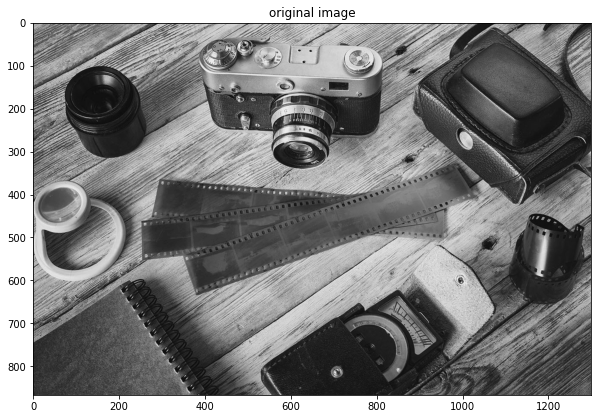

In [6]:
image = cv2.imread('gamma.png', 0) # our image has one channel

plt.rcParams["figure.figsize"] = [10, 10]
plt.title('original image')
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
def rescale(image):
    s = image.astype(float)
    s -= np.min(s)
    s /= np.max(s)

    return (s*255).astype(np.uint8)

In [8]:
"""
Formula of Gamma Transformation;

s = c . (r^gamma)

c:constant

Assume that r >= 0

""" 

'\nFormula of Gamma Transformation;\n\ns = c . (r^gamma)\n\nc:constant\n\nAssume that r >= 0\n\n'

In [9]:
def Gamma_transformation(r, c, gamma):
  r = r.astype(float)
  s = c * r ** gamma
  s = rescale(s)

  return s

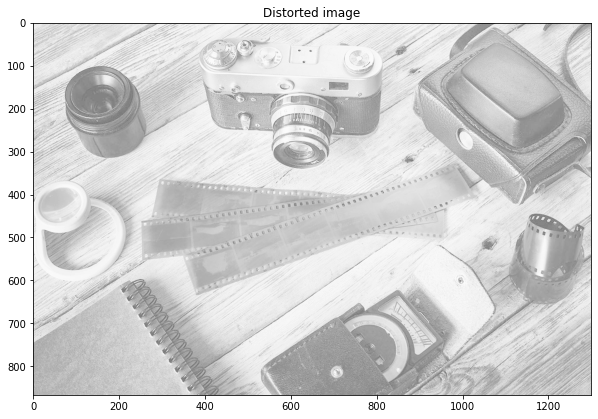

In [11]:
# I want to distort the image a little, and then I will use it in Gamma_transformation

def Log_transformation(r, c):
  r = r.astype(float)
  s = c * np.log(1+r)
  s = rescale(s)

  return s


distorted_image = Log_transformation(image, c=10)

plt.title('Distorted image')
plt.imshow(distorted_image, cmap='gray')

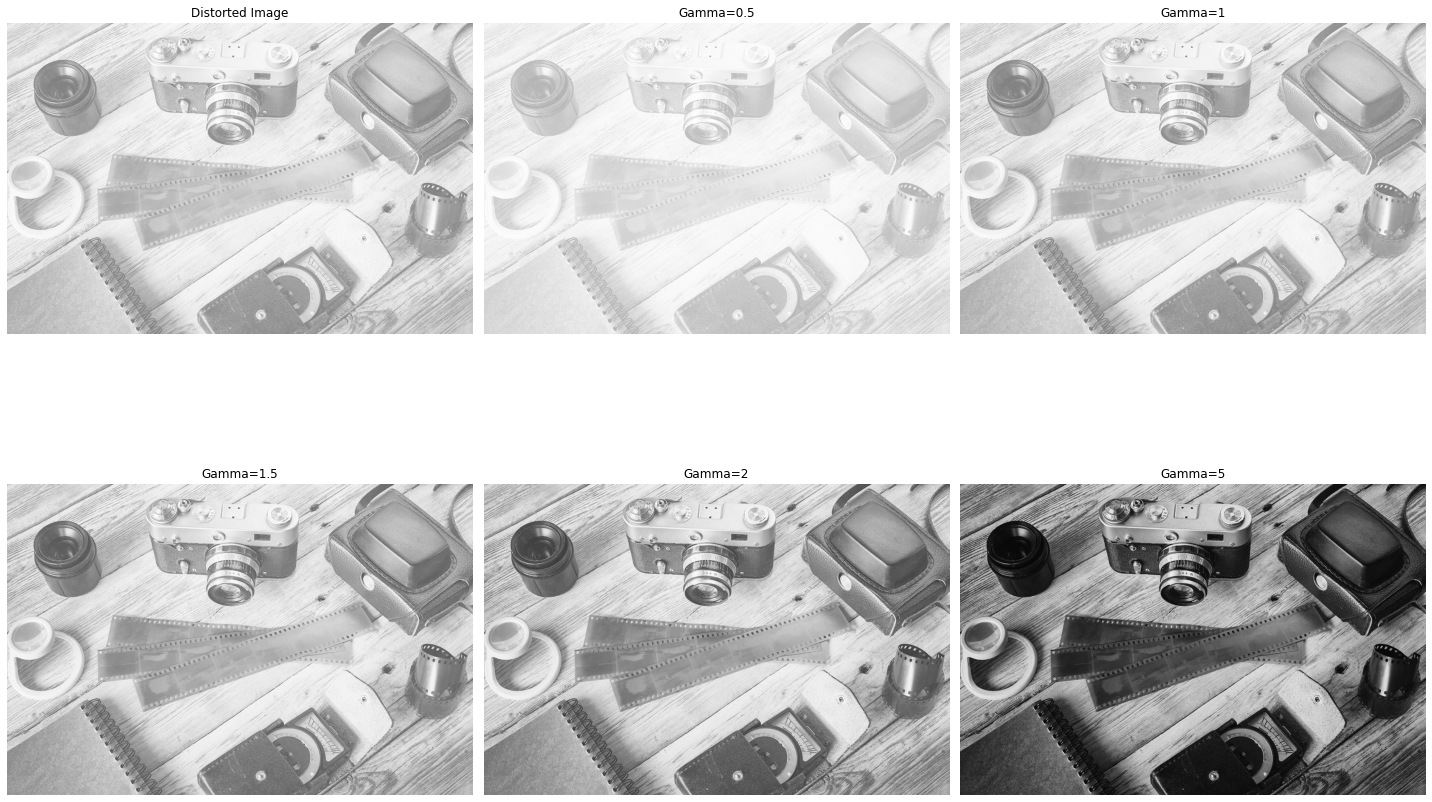

In [19]:
"""
Gamma Transformation

"""

# you can define c(constant) as what you want 

constant = 255/(np.log(1 + np.max(distorted_image)))

# how do it works out for different gamma values,let's look at them
results__images_list = []

for i in [0.5, 1, 1.5, 2, 5]:
  gamma_result = Gamma_transformation(distorted_image, c=constant, gamma=i)
  results__images_list.append(gamma_result)


# Display images
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=2, ncols=3)

# Row 1
ax[0][0].axis('off')
ax[0][0].title.set_text('Distorted Image')
ax[0][0].imshow(distorted_image, cmap='gray')

ax[0][1].axis('off')
ax[0][1].title.set_text('Gamma=0.5')
ax[0][1].imshow(results__images_list[0], cmap='gray')

ax[0][2].axis('off')
ax[0][2].title.set_text('Gamma=1')
ax[0][2].imshow(results__images_list[1], cmap='gray')

# Row 2
ax[1][0].axis('off')
ax[1][0].title.set_text('Gamma=1.5')
ax[1][0].imshow(results__images_list[2], cmap='gray')

ax[1][1].axis('off')
ax[1][1].title.set_text('Gamma=2')
ax[1][1].imshow(results__images_list[3], cmap='gray')

ax[1][2].axis('off')
ax[1][2].title.set_text('Gamma=5')
ax[1][2].imshow(results__images_list[4], cmap='gray')